## ASTR 680 Project: Visualizing Photon and Particle Orbits in Kerr Spacetime
Here, we will develop the full set of differential equations for geodesics around a Kerr black hole. Then, we will numerically integrate these to show the orbits for a few interesting cases. Using a visualization tool, we will attempt to make short videos as well for presentation purposes. 

In [5]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# Some constants
M = 1 # BH mass
a = 0 # BH dimensionless spin parameter (J/M; a = 0 corresponds to a Schwarzschild BH)
l = 0 # angular momentum
E = 1 # energy (E = 1 corresponds to rest-mass energy far from the BH)
Q = 0 # Carter constant

In [42]:
# Defining some expressions
def delta(r):
    return r**2 - 2*M*r + a**2

def sigma(r, theta):
    return r**2 + (a**2) * np.cos(theta)**2

e = 1 + E - E**2 # term to simplify the later expression for r'

In [43]:
# Defining our time derivatives of the coordinates with respect to the affine parameter

def t_dot(r, theta):
    num = E*(sigma(r, theta)*(r**2 + a**2) + 2*M*r*(a**2)*np.sin(theta)**2) - 2*a*M*r*l
    den = (sigma(r, theta) - 2*M*r)*(r**2 + a**2) - 2*M*r*(a**2)*np.sin(theta)**2
    return num/den

def phi_dot(r, theta):
    num = 2*a*M*r*E*(np.sin(theta)**2) + (sigma(r, theta) - 2*M*r)*l
    den =  (sigma(r, theta) - 2*M*r)*(r**2 + a**2)*np.sin(theta)**2 - 2*M*r*(a**2)*np.sin(theta)**4

    return num/den

def theta_dot(r, theta, prev_num, sign_theta, debug = False): 
    # if np.sin(theta) == 0 or np.cos(theta) == 0:
    #     theta = theta + 1e-5

    if a == 0:
        return 0, 0, 0 # for a Schwarzschild BH, theta_dot = 0

    if theta == np.pi/2 and a != 0:
        return 0, 0, 0

    num = Q + E*(a**2)*(np.cos(theta))**2 - (l**2)/(np.tan(theta)**2)
    den = sigma(r, theta)

    if debug:
        print("--------------------------------")
        print("Debugging theta_dot:")
        print(f"r_init: {r}")
        print(f"theta_init: {theta}")
        print(f"num: {num}")
        print(f"den: {den}")
        print(f"thetadot2: {num/den}")
        return 0, num, sign_theta

    # if num < 0:
    #     return np.sqrt(-num)/den # allows for turning points
    # else:
    #     return np.sqrt(num)/den
    if num/prev_num < 0:
        sign_theta = -sign_theta
        return sign_theta*np.sqrt(np.abs(num))/den, num, sign_theta
    else:
        return sign_theta*np.sqrt(np.abs(num))/den, num, sign_theta


def r_dot_particle(r, theta, prev_rdot2, sign_r, debug = False):
    term_1 = 2*((a**2)*np.cos(theta)**2 + r**2)**2
    term_2 = -2*(a**2)*(Q + e*(a**2)*np.cos(theta)**2)
    term_3 = 4*M*(a**2 + a*E*(a - 2*l) + l**2 + Q)
    term_4 = (2*E - 3*e)*a**2 - 2*(l**2 + Q) - e*np.cos(2*theta)*a**2 + 4*M*r + 2*(E - e)*r**2
    term_5 = -4*e*M*(a**2)*(np.sin(theta)**2)

    rdot2 = (term_2 + r*(term_3 + r*term_4 + term_5))/term_1

    if debug: 
        print("--------------------------------")
        print("Debugging r_dot_particle:")
        print(f"r_init: {r}")
        print(f"theta_init: {theta}")
        print(f"term_1: {term_1}")
        print(f"term_2: {term_2}")
        print(f"term_3: {term_3}")
        print(f"term_4: {term_4}")
        print(f"term_5: {term_5}")
        print(f"rdot2: {rdot2}")
        return 0, rdot2, sign_r
   
    if rdot2/prev_rdot2 < 0:
        sign_r = -sign_r
        return sign_r*np.sqrt(np.abs(rdot2)), rdot2, sign_r
    else:
        return sign_r*np.sqrt(np.abs(rdot2)), rdot2, sign_r
    # if rdot2 < 0:
    #     return np.sqrt(-rdot2) # allows for turning points
    # else:
    #     return -np.sqrt(rdot2) 

# def r_dot_particle(r, theta, debug = False):
#     theta_use = theta
#     if np.sin(theta) <= 1e-10 or np.cos(theta) <= 1e-10:
#         theta_use = theta + 1e-5

#     term_1 = -4*e*a**2 + 14*l**2 - 16*Q + (17*l**2 + 16*Q)*np.cos(2*theta_use) + 2*(2*e*a**2 + l**2)/np.sin(4*theta_use) - (l**2)*np.cos(6*theta_use)
#     term_2 = (5*e - 6*E - 6)*a**2 + 8*a*E*l + l**2 - 4*Q + 4*np.cos(2*theta_use)*((a**2)*(E**2) - 2*a*E*l + 2*l**2 + Q) + np.cos(4*theta_use)*((2 + 2*E - e)*a**2 - l**2)
#     term_3 = (4*E - 5*e)*a**2 + l**2 - 4*Q + 4*np.cos(2*theta_use)*((e - E)*a**2 + 2*l**2 + Q) + np.cos(4*theta_use)*(e*a**2 - l**2)
#     term_4 = 128*(a**2)*(M**2)*(np.cos(theta_use)**4)*(np.sin(theta_use)**2)*(l - a*E)**2 + 64*M*(np.sin(theta_use)**2)*r**5 + 32*(E - e)*(np.sin(theta_use)**2)*r**6 
#     + 16*(a**2)*(np.sin(2*theta_use)**2)*M*r*(a*E - l)*(2*a*E - l + l*np.cos(2*theta_use))

#     den = 32*(r**3 + r*(a**2)*np.cos(theta_use)**2)**6

#     rdot2 = (1/np.sin(theta_use)**2)*((a**2)*(r**2)*term_1 - 8*M*(r**3)*term_2 + 4*(r**4)*term_3 + term_4)/den

#     if debug:
#         print("--------------------------------")
#         print("Debugging r_dot_particle:")
#         print(f"r_init: {r}")   
#         print(f"theta_init: {theta}")
#         print(f"term_1: {term_1}")
#         print(f"term_2: {term_2}")
#         print(f"term_3: {term_3}")
#         print(f"term_4: {term_4}")
#         print(f"den: {den}")
#         print(f"rdot2: {rdot2}")
    
#     return -np.sqrt(rdot2) # choose the negative square root since the particle is falling into the BH

In [44]:
# Initial conditions
r0 = 10
theta0 = np.pi/2
phi0 = 0
t0 = 0

# Set up the orbit run 
n_iter = 10000
#total_sim_time = n_iter * dt # just keep this in case we need it 

# Initialize the arrays to store the values of the coordinates
r_values = np.zeros(n_iter)
theta_values = np.zeros(n_iter)
phi_values = np.zeros(n_iter)
t_values = np.zeros(n_iter)

r_values[0] = r0
theta_values[0] = theta0
phi_values[0] = phi0
t_values[0] = t0

In [45]:
# Run the orbit
end_step = n_iter
dt = 0.1 # step size

sign_theta = -1 # initial sign of theta_dot
sign_r = -1 # initial sign of r_dot
prev_num = 1 # initial value for num -- does not matter, just matches sign_theta
prev_rdot2 = 1 # initial value for rdot2 -- does not matter, just matches sign_r

for i in range(1, n_iter):
    print(r_values[i-1])
    print(theta_values[i-1])
    print(r_dot_particle(r_values[i-1], theta_values[i-1], prev_rdot2, sign_r)[0])
    print(theta_dot(r_values[i-1], theta_values[i-1], prev_num, sign_theta)[0])
    print('-------------------')
    # print(sign_theta)
    # print(prev_num)
    # print(sign_r)
    # print(prev_rdot2)
    # print('-------------------')
    # print(i)
    # dt *= (r_values[i-1]/r0)**2 # reduce the step size as the particle approaches the BH

    # # enforce periodicity in theta
    # while theta_values[i-1] >= 2*np.pi:
    #     theta_values[i-1] -= 2*np.pi 
    
    # while theta_values[i-1] <= -2*np.pi:
    #     theta_values[i-1] += 2*np.pi
    
    # # enforce periodicity in phi
    # while phi_values[i-1] >= 2*np.pi:
    #     phi_values[i-1] -= 2*np.pi 
    
    # while phi_values[i-1] <= -2*np.pi:
    #     phi_values[i-1] += 2*np.pi
    
    if np.isnan(r_values[i-1]):
        end_step = i-1
        print("Error! r is NaN at timestep: ", i-1)
        r_debug = r_dot_particle(r_values[i-2], theta_values[i-2], debug = True)
        theta_debug = theta_dot(r_values[i-2], theta_values[i-2], debug = True)
        break

    if (r_values[i-1] >= 0 and r_values[i-1] <= 0 + 1e-5) or (r_values[i-1] <= 0):
        r_values[i-1] = 0
        end_step = i-1
        print("The particle hit the singularity at timestep", i-1)
        break

    r_values[i] = r_values[i-1] + r_dot_particle(r_values[i-1], theta_values[i-1], prev_rdot2, sign_r)[0] * dt # update r
    theta_values[i] = theta_values[i-1] + theta_dot(r_values[i-1], theta_values[i-1], prev_num, sign_theta)[0] * dt # update theta
    phi_values[i] = phi_values[i-1] + phi_dot(r_values[i-1], theta_values[i-1]) * dt # update phi
    t_values[i] = t_values[i-1] + t_dot(r_values[i-1], theta_values[i-1]) * dt # update t

    sign_r = r_dot_particle(r_values[i-1], theta_values[i-1], prev_rdot2, sign_r)[2] # update sign_r
    sign_theta = theta_dot(r_values[i-1], theta_values[i-1], prev_num, sign_theta)[2] # update sign_theta
    prev_num = theta_dot(r_values[i-1], theta_values[i-1], prev_num, sign_theta)[1] # update prev_num
    prev_rdot2 = r_dot_particle(r_values[i-1], theta_values[i-1], prev_rdot2, sign_r)[1] # update prev_rdot2

10.0
1.5707963267948966
-0.4472135954999579
0
-------------------
9.955278640450004
1.5707963267948966
-0.4482169621510359
0
-------------------
9.9104569442349
1.5707963267948966
-0.4492293867511907
0
-------------------
9.86553400555978
1.5707963267948966
-0.45025101330534323
0
-------------------
9.820508904229246
1.5707963267948966
-0.4512819891103177
0
-------------------
9.775380705318215
1.5707963267948966
-0.45232246485331884
0
-------------------
9.730148458832883
1.5707963267948966
-0.45337259471405844
0
-------------------
9.684811199361476
1.5707963267948966
-0.4544325364706942
0
-------------------
9.639367945714406
1.5707963267948966
-0.4555024516097504
0
-------------------
9.593817700553432
1.5707963267948966
-0.4565825054402003
0
-------------------
9.548159450009411
1.5707963267948966
-0.45767286721189643
0
-------------------
9.50239216328822
1.5707963267948966
-0.45877371023855024
0
-------------------
9.456514792264366
1.5707963267948966
-0.45988521202546645
0
----

Text(0, 0.5, 't')

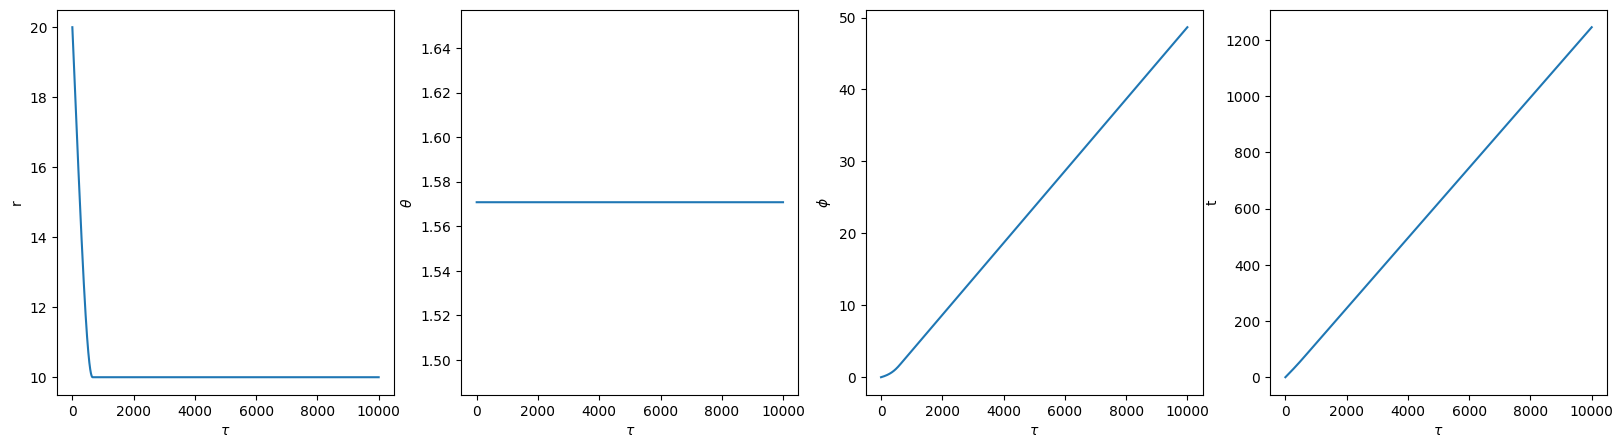

In [39]:
# Plot the orbit
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(np.arange(0, end_step), r_values[:end_step])
ax[0].set_xlabel(r"$\tau$")
ax[0].set_ylabel("r")

ax[1].plot(np.arange(0, end_step), theta_values[:end_step])
ax[1].set_xlabel(r"$\tau$")
ax[1].set_ylabel(r"$\theta$")

ax[2].plot(np.arange(0, end_step), phi_values[:end_step])
ax[2].set_xlabel(r"$\tau$")
ax[2].set_ylabel(r"$\phi$")

ax[3].plot(np.arange(0, end_step), t_values[:end_step])
ax[3].set_xlabel(r"$\tau$")
ax[3].set_ylabel("t")

MovieWriter imagemagick unavailable; using Pillow instead.


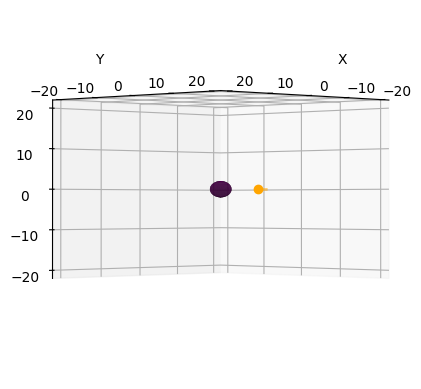

In [40]:
start_step = 0
end_step = 900
# Visualization 
r_arr = r_values[start_step:end_step]
theta_arr = theta_values[start_step:end_step]
phi_arr = phi_values[start_step:end_step]

# Convert to Cartesian coordinates
x = r_arr * np.sin(theta_arr) * np.cos(phi_arr)
y = r_arr * np.sin(theta_arr) * np.sin(phi_arr)
z = r_arr * np.cos(theta_arr)

# Event horizon radius for Kerr BH
r_s = M + np.sqrt(M**2 - a**2)  

######## MAKE THE ANIMATION ########
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
trail_length = 50 # Number of points in the trail

# Plot event horizon
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
X = r_s * np.outer(np.sin(v), np.cos(u))
Y = r_s * np.outer(np.sin(v), np.sin(u))
Z = r_s * np.outer(np.cos(v), np.ones_like(u))
ax.plot_surface(X, Y, Z, color='black', alpha=0.5)

# Plot ergosphere
theta_ergo = np.linspace(0, np.pi, 100)  # Polar angle
phi_ergo = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle
theta_ergo, phi_ergo = np.meshgrid(theta_ergo, phi_ergo)

r_ergo = M + np.sqrt(M**2 - a**2 * np.cos(theta_ergo)**2)

x_ergo = r_ergo * np.sin(theta_ergo) * np.cos(phi_ergo)
y_ergo = r_ergo * np.sin(theta_ergo) * np.sin(phi_ergo)
z_ergo = r_ergo * np.cos(theta_ergo)
ax.plot_surface(x_ergo, y_ergo, z_ergo, color='purple', alpha=0.5)

line, = ax.plot([], [], [], color = "orange", alpha = 0.5, lw=2)
point, = ax.plot([], [], [], 'o', color="orange")  # particle

# Plot z = 0 plane for out-of-plane animations
# plane_size = 2 * M  # Adjust to match the size of your plot grid
# x_plane = np.linspace(-r0 - 2, r0 + 2, 50)
# y_plane = np.linspace(-r0 - 2, r0 + 2, 50)
# x_plane, y_plane = np.meshgrid(x_plane, y_plane)
# z_plane = np.zeros_like(x_plane)  # z = 0 plane
# ax.plot_surface(x_plane, y_plane, z_plane, color='gray', alpha=0.3, edgecolor='none')

def init():
    ax.set_xlim(-r0 - 2, r0 + 2)
    ax.set_ylim(-r0 - 2, r0 + 2)
    ax.set_zlim(-r0 - 2, r0 + 2)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return line, point

# Update function
def update(frame):
    start = max(0, frame - trail_length)
    line.set_data(x[start:frame+1], y[start:frame+1])
    line.set_3d_properties(z[start:frame+1])
    point.set_data(x[frame:frame+1], y[frame:frame+1])
    point.set_3d_properties(z[frame:frame+1])
    
    ax.view_init(elev=0 + frame * 0.4, azim=45) # rolling camera angle over the x-y plane
    #ax.view_init(elev=90, azim=0) # face-on view
    #ax.view_init(elev=0, azim=90) # edge-on view
    #ax.view_init(elev=10, azim=90) # tilted view
    
    return line, point

ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=33) # frame rate (fps) = 1000/interval
ani.save("orbit_schwarszchild.gif", writer="imagemagick")